# **<center>The Intersection of Drinking Water Quality and Environmental (In)Justice in Montréal, QC</center>**
<hr>

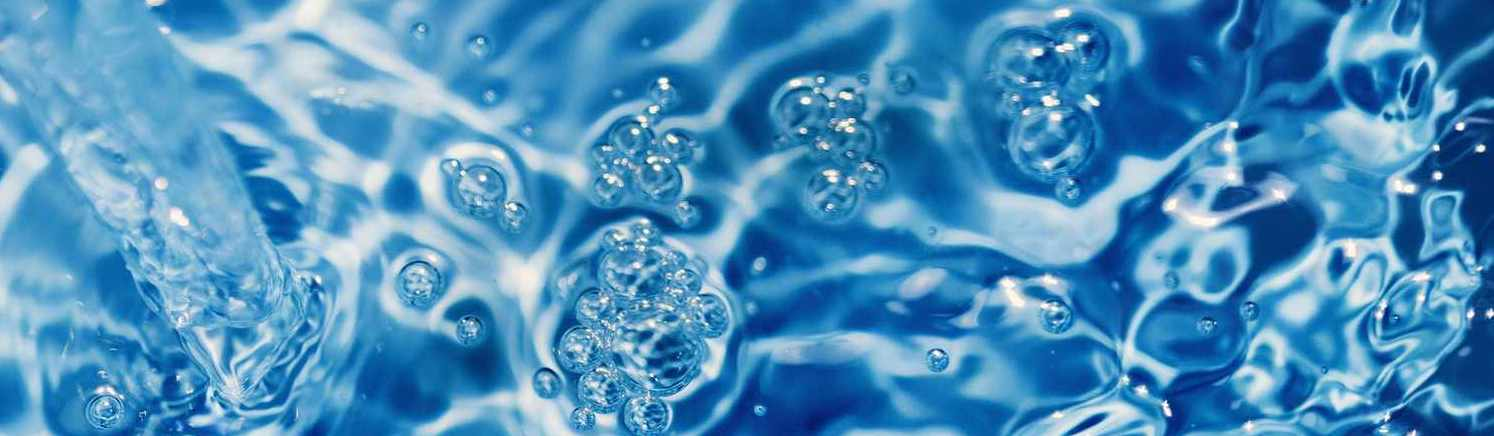

#### *<center>By Sara Fraser Härstedt</center>*


<div style="background-color: lightblue; padding: 3px;">
    
## **Introduction**
    
</div>

Water quality is a critical issue that affects everyone, regardless of where they live. In Montreal, the largest city in the province of Quebec, access to clean and safe drinking water is essential for the health and well-being of its residents. In this project, we will examine the current state of water quality in Montreal and explore how it varies across different boroughs. Specifically, we will investigate whether there are disparities in access to clean water based on socioeconomic factors such as for visible minorities. My research questions are as follows: 

- *What is the current state of water quality in Montreal, and how does it vary across different neighborhoods or regions?* 
- *Are there disparities in access to clean water based on socioeconomic factors such as visible minorities in Montreal?* 

By addressing these questions, I hope to shed light on an important issue that affects the health and well-being of all Montrealers.

<div style="background-color: lightblue; padding: 3px;">
    
## **First off all, let's download some packages & modules we'll be needing:**

</div>



In [3]:
#Requirements for our code to run properly
!pip install geopandas
!pip install pandas
!pip install matplotlib
!pip install folium
!pip install mapclassify
!pip install seaborn
!pip install pyogrio

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import geopandas as gpd
import seaborn as sns
from matplotlib import colors
import os

<div style="background-color: lightblue; padding: 3px;">
    
## **Fetching & Cleaning: Water Quality Data**

</div>


Next, we are reading in our data that is a GeoJSON file from the Quebec Data website, and displaying the column names in our dataset in order to determine which ones to use as indicators of water quality.


### I decided to use these columns as inidcators of the water quality in the montreal area:
- **"EP_NP_MTM"** that stands for **"Amount of pipes classified bad/very bad"** 
- **"EP_POSS_PL"** that shows **"Possible lead occurrence"**

### Subsetting data:
Once we found our indicators, we subset them into a new geopanda dataset called "waterQ" which hold the two columns specified above, as well as Montreal boroughs. However since the dataset had multiple rows of the same borough, we had to combine those rows. In grouping all of the rows with the same borough names, we additionally get the mean value of the number of pipes classified bad/very bad, as well as display the most frequently occuring value for the occurrence of lead.

### Data diclaimer:
Because this project aims to establish links between water quality and environmental injustices, the data analysis approach involves simplifying the data by taking the most frequent value of lead occurrence. However, this simplification results in a generalization of our values, which may compromise the accuracy of identifying areas where lead is occurring. While this approach may not yield precise results, it is justified in the context of the project's main objective.


In [17]:
gdf = gpd.read_file('pim_troncon_unifie_l_j.geojson')

print(gdf.columns)

Index(['OBJECTID', 'NOM_ARROND', 'ID_TRC_PI', 'RUE', 'DE', 'A', 'LONGUEUR',
       'EP_LNG_CND', 'EP_NB_CND', 'EP_NB_MTM', 'EP_NB_BRIS', 'EP_TX_BRIS',
       'EP_HIERAR', 'EP_POSS_PL', 'EP_DUR_VIE', 'EP_JURIDI', 'EU_LNG_CND',
       'EU_NB_CND', 'EU_NB_MTM', 'EU_OEPACP', 'EU_CIS', 'EU_HIERAR',
       'EU_JURIDI', 'EPL_LNG_CD', 'EPL_NB_CND', 'EPL_NB_MTM', 'EPL_OEPACP',
       'EPL_CIS', 'EPL_HIERAR', 'EPL_JURIDI', 'CH_SUPERFI', 'CH_DATE_IN',
       'CH_PCI_MES', 'CH_IRI_MES', 'CH_NB_MTM', 'CH_CATEGOR', 'CH_HIERAR',
       'CH_JURIDI', 'EP', 'EU', 'EPL', 'CH', 'EP_ACT_CR', 'EU_ACT_CR',
       'EPL_ACT_CR', 'CH_ACT_CR', 'EP_TRAV', 'EP_LN_INT', 'EP_COUTS',
       'EU_TRAV', 'EU_LN_INT', 'EU_COUTS', 'EPL_TRAV', 'EPL_LN_INT',
       'EPL_COUTS', 'CH_TRAV', 'CH_LN_INT', 'CH_COUTS', 'TOTAL_COUT',
       'DATE_SIAD', 'INT_DPH_TM', 'INT_DG_MDL', 'REMARQUE1', 'REMARQUE2',
       'UNITEDGSRE', 'geometry'],
      dtype='object')


In [19]:
waterQ = gdf[['EP_NB_MTM','EP_POSS_PL','NOM_ARROND','geometry']]

In [102]:
#Taking a look at the values of my dataset "waterQ"
waterQ

,geometry,EP_NB_MTM,EP_POSS_PL
NOM_ARROND,,,
Ahuntsic-Cartierville,MULTILINESTRING Z ((-73.66550 45.53556 0.00000...,0.168568,Yes
Anjou,MULTILINESTRING Z ((-73.60235 45.61259 0.00000...,0.041667,No
Côte-des-Neiges-Notre-Dame-de-Grâce,MULTILINESTRING Z ((-73.64424 45.47393 0.00000...,0.139608,Yes
L'île-Bizard-Sainte-Geneviève,MULTILINESTRING Z ((-73.88797 45.49405 0.00000...,0.057554,No
LaSalle,MULTILINESTRING Z ((-73.66547 45.42858 0.00000...,0.069343,No
Lachine,MULTILINESTRING Z ((-73.69821 45.43703 0.00000...,0.206461,No
Le Plateau-Mont-Royal,MULTILINESTRING Z ((-73.57617 45.52398 0.00000...,0.180538,Yes
Le Sud-Ouest,MULTILINESTRING Z ((-73.58544 45.47257 0.00000...,0.206287,No
Mercier-Hochelaga-Maisonneuve,MULTILINESTRING Z ((-73.54877 45.54533 0.00000...,0.089378,Yes


In [20]:
waterQ = waterQ.dropna()
waterQ['EP_NB_MTM']=waterQ['EP_NB_MTM'].astype(int)

In [21]:
waterQ=waterQ.dissolve(
    by='NOM_ARROND',
    aggfunc={
        'EP_NB_MTM':'mean',
        'EP_POSS_PL': lambda x:
        x.mode()[0]
        },
)

<div style="background-color: lightblue; padding: 3px;">
    
## **Mapping Water Quality**

</div>


Text(70.22222222222221, 0.5, 'Latitude')

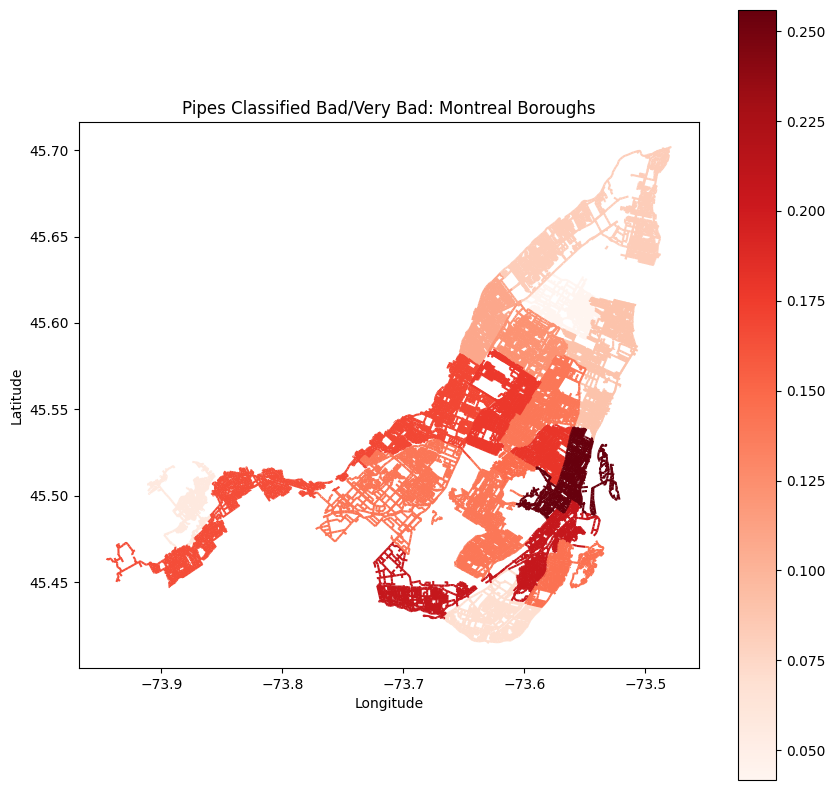

In [85]:
# Mapping amount of bad/very bad pipes in Mtl
waterQ.plot(column='EP_NB_MTM',cmap='Reds',legend=True,figsize=(10, 10))
# Add a title to the plot
plt.title('Pipes Classified Bad/Very Bad: Montreal Boroughs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


#### **This code presents the top 5 boroughs with the higest values for "bad/very bad" classified pipes**:

In [105]:
top_boroughs = waterQ.sort_values('EP_NB_MTM', ascending=False).head(5)

# Print the top 5 rows
print(top_boroughs)

                                                                               geometry   
NOM_ARROND                                                                                
Ville-Marie                           MULTILINESTRING Z ((-73.54956 45.52783 0.00000...  \
Lachine                               MULTILINESTRING Z ((-73.69821 45.43703 0.00000...   
Le Sud-Ouest                          MULTILINESTRING Z ((-73.58544 45.47257 0.00000...   
Le Plateau-Mont-Royal                 MULTILINESTRING Z ((-73.57617 45.52398 0.00000...   
Villeray-Saint-Michel-Parc-Extension  MULTILINESTRING Z ((-73.61978 45.54794 0.00000...   

                                      EP_NB_MTM EP_POSS_PL  
NOM_ARROND                                                  
Ville-Marie                            0.255917         No  
Lachine                                0.206461         No  
Le Sud-Ouest                           0.206287         No  
Le Plateau-Mont-Royal                  0.180538        Ye

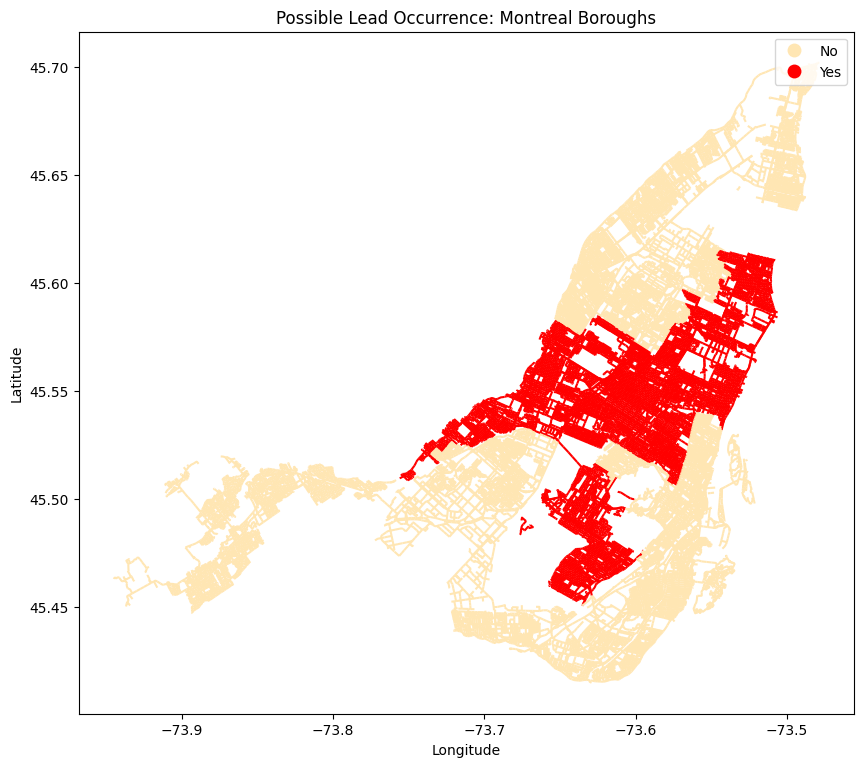

In [84]:
# Create a dictionary to map oui and non to Yes and No
labels = {'Oui': 'Yes', 'non': 'No'}

# Replace oui and non with Yes and No in the column
waterQ['EP_POSS_PL'] = waterQ['EP_POSS_PL'].replace(labels)

# Create a colormap object with red and orange colors
cmap = colors.ListedColormap(['#FFE6B3', 'red'])

# Plot the data using the colormap
waterQ.plot(column='EP_POSS_PL', cmap=cmap, legend=True,figsize=(10, 10))

# Add a title to the plot
plt.title('Possible Lead Occurrence: Montreal Boroughs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Show the plot
plt.show()

#### **Through this code we discover which boroughs are subjected to possible lead occurence in drinking water:**

In [104]:
lead_boroughs = waterQ[waterQ['EP_POSS_PL'] == 'Yes']
lead_boroughs

,geometry,EP_NB_MTM,EP_POSS_PL
NOM_ARROND,,,
Ahuntsic-Cartierville,MULTILINESTRING Z ((-73.66550 45.53556 0.00000...,0.168568,Yes
Côte-des-Neiges-Notre-Dame-de-Grâce,MULTILINESTRING Z ((-73.64424 45.47393 0.00000...,0.139608,Yes
Le Plateau-Mont-Royal,MULTILINESTRING Z ((-73.57617 45.52398 0.00000...,0.180538,Yes
Mercier-Hochelaga-Maisonneuve,MULTILINESTRING Z ((-73.54877 45.54533 0.00000...,0.089378,Yes
Rosemont-La Petite-Patrie,MULTILINESTRING Z ((-73.58157 45.56045 0.00000...,0.139947,Yes
Villeray-Saint-Michel-Parc-Extension,MULTILINESTRING Z ((-73.61978 45.54794 0.00000...,0.177546,Yes


<div style="background-color: lightblue; padding: 3px;">
    
## **What is the current state of water quality in Montreal, and how does it vary across different neighborhoods or regions?**

</div>

After analyzing the values and visually displaying these two maps from our water data, we can now dive into our first research question. The state of water quality varies significantly from one borough to another, and we can see certain correlations between where drinking water pipes maintenance is not highly prioritized as well as where there is possible occurrence of lead in drinking water.  

From the data provided in this project, **Le Plateau-Mont-Royal** & **Villeray-Saint-Michel-Parc-Extension** are the two boroughs with the worst drinking water quality/water pipe management with both possible traces of lead as well as higher number of bad/very bad water pipes.


<div style="background-color: lightblue; padding: 3px;">
    
## **Fetching & Cleaning: Visible Minorities Data**

</div>

Here, we are reading in a .shp file from lab 4 that well use the geometry from, as well as .csv file collected from CHASS with our population and visible minority data. 

We want to display visible minorities as a percentage, so we divide the visible minority data of a specific place with the total population in that area, and times is by 100. 
This gives us **minority_perc**.

### Merging datasets
To visually display areas of high settlement by visible minorities, we merged our shapefile and minority data using the common denominator of the DAUID column. Once the data was transformed into a geodataframe, we plotted the column **minority_perc**.


In [78]:
shpfile = gpd.read_file('lda_000b16a_e.shp', engine='pyogrio')

In [79]:
import pandas as pd
minority_data = pd.read_csv('visibleminority.csv')
minority_data

,COL0,COL1,COL2
0,2466,2004265,737510.0
1,24660001,651,20.0
2,24660002,542,60.0
3,24660003,303,30.0
4,24660004,273,0.0
...,...,...,...
3224,24663493,485,140.0
3225,24663494,0,NaN
3226,24663495,892,545.0
3227,24663496,869,390.0


In [80]:
minority_data['minority_perc']= ((minority_data['COL2']/minority_data['COL1'])*100)
minority_data

,COL0,COL1,COL2,minority_perc
0,2466,2004265,737510.0,36.797030
1,24660001,651,20.0,3.072197
2,24660002,542,60.0,11.070111
3,24660003,303,30.0,9.900990
4,24660004,273,0.0,0.000000
...,...,...,...,...
3224,24663493,485,140.0,28.865979
3225,24663494,0,NaN,NaN
3226,24663495,892,545.0,61.098655
3227,24663496,869,390.0,44.879171


In [53]:
minority_data= minority_data.rename(columns={'COL0':'DAUID'})

In [54]:
to_convert = {'DAUID': 'int64'}
shpfile = shpfile.astype(to_convert)
shpfile.dtypes

DAUID          int64
PRUID         object
PRNAME        object
CDUID         object
CDNAME        object
CDTYPE        object
CCSUID        object
CCSNAME       object
CSDUID        object
CSDNAME       object
CSDTYPE       object
ERUID         object
ERNAME        object
SACCODE       object
SACTYPE       object
CMAUID        object
CMAPUID       object
CMANAME       object
CMATYPE       object
CTUID         object
CTNAME        object
ADAUID        object
geometry    geometry
dtype: object

In [55]:
to_convert = {'DAUID': 'int64'}
minority_data = minority_data.astype(to_convert)
minority_data.dtypes

DAUID              int64
COL1               int64
COL2             float64
minority_perc    float64
dtype: object

In [56]:
merged_gdf = pd.merge(
    minority_data,
    shpfile,
    how='inner',
    on='DAUID'
    
)

merged_gdf

,DAUID,COL1,COL2,minority_perc,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,...,SACCODE,SACTYPE,CMAUID,CMAPUID,CMANAME,CMATYPE,CTUID,CTNAME,ADAUID,geometry
0,24660001,651,20.0,3.072197,24,Quebec / Québec,2466,Montréal,TÉ,2466023,...,462,1,462,24462,Montréal,B,4620580.03,0580.03,24660001,"POLYGON ((7632208.177 1268333.720, 7632180.546..."
1,24660002,542,60.0,11.070111,24,Quebec / Québec,2466,Montréal,TÉ,2466023,...,462,1,462,24462,Montréal,B,4620580.03,0580.03,24660001,"POLYGON ((7631916.654 1267639.486, 7631922.811..."
2,24660003,303,30.0,9.900990,24,Quebec / Québec,2466,Montréal,TÉ,2466023,...,462,1,462,24462,Montréal,B,4620580.03,0580.03,24660001,"POLYGON ((7631962.934 1267729.743, 7631781.297..."
3,24660004,273,0.0,0.000000,24,Quebec / Québec,2466,Montréal,TÉ,2466023,...,462,1,462,24462,Montréal,B,4620580.03,0580.03,24660001,"POLYGON ((7631758.591 1267304.960, 7631796.726..."
4,24660005,231,45.0,19.480519,24,Quebec / Québec,2466,Montréal,TÉ,2466023,...,462,1,462,24462,Montréal,B,4620580.03,0580.03,24660001,"POLYGON ((7632047.437 1267063.994, 7631991.320..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,24663445,4206,1410.0,33.523538,24,Quebec / Québec,2466,Montréal,TÉ,2466023,...,462,1,462,24462,Montréal,B,4620069.02,0069.02,24660158,"POLYGON ((7632890.066 1243776.226, 7632890.291..."
3181,24663450,457,145.0,31.728665,24,Quebec / Québec,2466,Montréal,TÉ,2466023,...,462,1,462,24462,Montréal,B,4620218.00,0218.00,24660104,"POLYGON ((7627187.826 1247362.574, 7627161.920..."
3182,24663451,424,105.0,24.764151,24,Quebec / Québec,2466,Montréal,TÉ,2466023,...,462,1,462,24462,Montréal,B,4620218.00,0218.00,24660104,"POLYGON ((7627115.377 1247328.289, 7627161.920..."
3183,24663452,2390,1610.0,67.364017,24,Quebec / Québec,2466,Montréal,TÉ,2466023,...,462,1,462,24462,Montréal,B,4620069.01,0069.01,24660143,"POLYGON ((7632254.011 1243824.649, 7632233.886..."


In [57]:
merged_gdf=gpd.GeoDataFrame(merged_gdf)

In [58]:
merged_gdf.crs

<Projected CRS: PROJCS["PCS_Lambert_Conformal_Conic",GEOGCS["NAD83 ...>
Name: PCS_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [60]:
merged_gdf = merged_gdf.to_crs('EPSG:4326')

<div style="background-color: lightblue; padding: 3px;">
    
## **Mapping Visible Minorities**

</div>

Text(70.22222222222221, 0.5, 'Latitude')

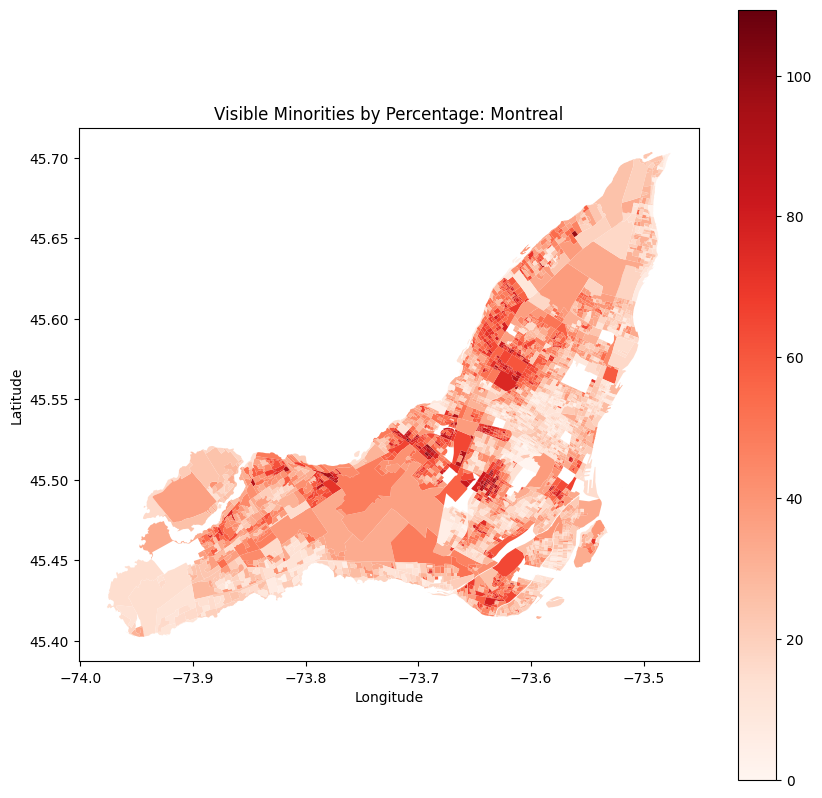

In [82]:
merged_gdf.plot(column='minority_perc', legend=True, cmap='Reds',figsize=(10, 10))
plt.title('Visible Minorities by Percentage: Montreal')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#### We can observe the highest percentages of minority neighbourhoods in the boroughs of:

- Montreal Nord
- Ahuntsic-Cartierville 
- LaSalle
- Villeray-Saint-Michel-Parc-Extension
- Côte-des-Neiges–Notre-Dame-de-Grâce

#### Whereas the lowest concentration is found in boroughs such as:

- L'île-Bizard–Sainte-Geneviève 
- Beaconsfield
- Rivière des Prairies 
- Rosemont La petite Patrie

<div style="background-color: lightblue; padding: 3px;">
    
## **Are there disparities in access to clean water based on socioeconomic factors such as visible minorities in Montreal?**

</div>

#### **Data Disclaimer**
The water quality data is classified by boroughs, however the visible minority is displayed by GEO ID which divide up the island of montreal into smaller groups, however it is stil displayed effectively only more precisely.

Additionally, had I allocated my time in a more effective manner, I would've included low income data from the island of Montreal, as it would've possibly brought forward stronger correlation.


<div style="background-color: lightblue; padding: 3px;">
    
### **Pipes Classified Bad/Very Bad: Montreal Boroughs VS. Visible Minorities by Percentage: Montreal**
    
</div>

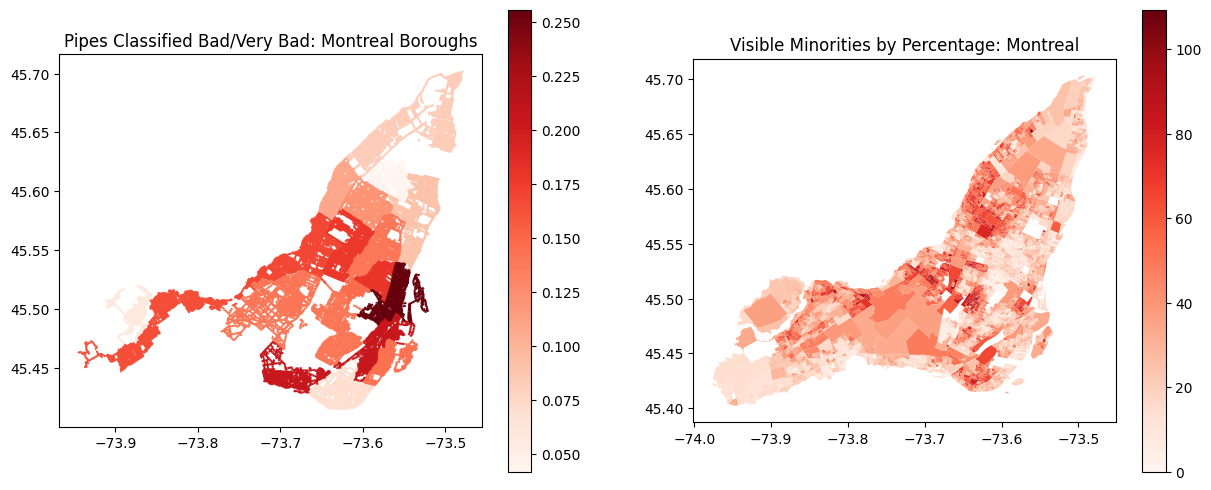

In [100]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))

# Plot the first map
waterQ.plot(column='EP_NB_MTM', cmap='Reds', legend=True, ax=ax1)
ax1.set_title('Pipes Classified Bad/Very Bad: Montreal Boroughs')

# Plot the second map
merged_gdf.plot(column='minority_perc', cmap='Reds', legend=True, ax=ax2)
ax2.set_title('Visible Minorities by Percentage: Montreal')

# Display the plots
plt.show()

#### **As stated earlier; the top 5 boroughs in montreal with the highest amount of pipes classified bad or very bad turned out to be:**
- Ville-Marie                          
- Lachine                                 
- Le Sud-Ouest                            
- Le Plateau-Mont-Royal                 
- Villeray-Saint-Michel-Parc-Extension 

#### **Comparatively, we can see that the boroughs with the highest visible minority population is:** 
- Montreal Nord
- Ahuntsic-Cartierville 
- LaSalle
- Villeray-Saint-Michel-Parc-Extension
- Côte-des-Neiges–Notre-Dame-de-Grâce

We can draw a conclusion that soley **Villeray-Saint-Michel-Parc-Extension** occurs in both categories. 

Riga's article "Explainer: Why do Montreal water mains burst so often?" cites several factors, such as temperature swings, aging infrastructure, and pressure changes, to explain why Montreal's sewage and drinking water infrastructure is notoriously poor. Although there was a low level of correlation found between water and minority data in this project, studies, such as the one conducted in Washington DC, have shown that the populations most vulnerable to lead exposure are those unable to afford necessary repairs. Unfortunately, this often translates to a disproportionate impact on African-American communities.


<div style="background-color: lightblue; padding: 3px;">
    
### **Possible Lead Occurrence: Montreal Boroughs VS. Visible Minorities by Percentage: Montreal**
    
</div>

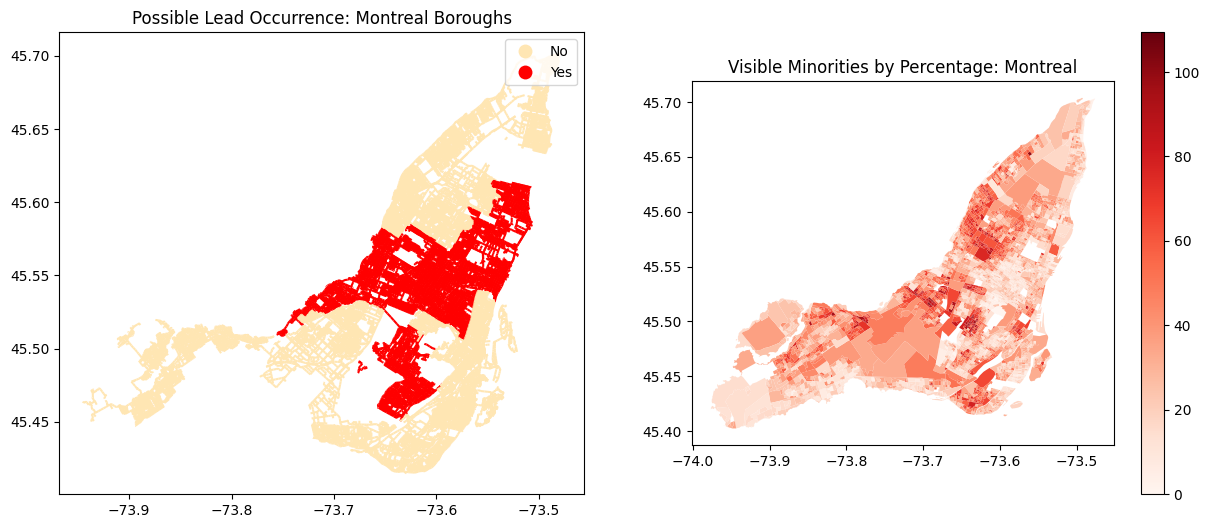

In [101]:
# Create a dictionary to map oui and non to Yes and No
labels = {'Oui': 'Yes', 'non': 'No'}
waterQ['EP_POSS_PL'] = waterQ['EP_POSS_PL'].replace(labels)

# Create a colormap object with green and red colors
cmap = colors.ListedColormap(['#FFE6B3', 'red'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))

# Plot the first map
waterQ.plot(column='EP_POSS_PL', cmap=cmap, legend=True, ax=ax1)
ax1.set_title('Possible Lead Occurrence: Montreal Boroughs')

# Plot the second map
merged_gdf.plot(column='minority_perc', cmap='Reds', legend=True, ax=ax2)
ax2.set_title('Visible Minorities by Percentage: Montreal')

# Display the plots
plt.show()

#### **Analyzing lead occurrence, we found that our possible lead boroughs were:**
- Ahuntsic-Cartierville
- Côte-des-Neiges-Notre-Dame-de-Grâce 
- Le Plateau-Mont-Royal 
- Mercier-Hochelaga-Maisonneuve 
- Rosemont-La Petite-Patrie 
- Villeray-Saint-Michel-Parc-Extension 

#### **Comparatively, we can see that the boroughs with the highest visible minority population is:**
- Montreal Nord
- Ahuntsic-Cartierville 
- LaSalle
- Villeray-Saint-Michel-Parc-Extension
- Côte-des-Neiges–Notre-Dame-de-Grâce

#### **From these two variables we can observe a correlation between:**
- Villeray-Saint-Michel-Parc-Extension
- Côte-des-Neiges–Notre-Dame-de-Grâce
- Ahuntsic-Cartierville 

Which gives us correlation values of 50% (3/6) and 60% (3/5). 

From Ghostin L. O.'s "Lead in the Water: A Tale of Social and Environmental Injustice" we understand that there is no such thing as safe levels of lead in drinking water as even small occurences have devastating impacts on epecially developing bodies of children. The frequence of occurrence of these types of contaminants often peak in neighborhoods where there is a higher percentage of poor and social minorities present, as proven in the previously mentioned study. Your background or income should not determine your access to safe drinking water, however the majority of cases of water crises unravel narratives of social and racial injustice. 

<div style="background-color: lightblue; padding: 3px;">
    
## **So, how do we tackle this problem?**

</div>

The first step towards environmental justice is to raise awareness and present scientific data that supports the existence of these injustices. Even if the outcomes of studies are not always conclusive, shedding light on societal problems can spark crucial conversations and lead to action on an individual level, which can have a ripple effect towards a more just and sustainable society.

Additionally, using resources such as the ones presented to us in this class, as well as ArcGIS, are powerful tools in terms of data visualizaton which can help display patterns of injustice. 


<div style="background-color: lightblue; padding: 3px;">
    
## **Conclusion**

</div>

In conclusion, as far as the extent of this data goes we can (luckily) not state that there is a strong correlation between visible minorities and bad drinking water quality in Montreal, despite there being some overlapping in the two data variables, especially in the borough of **Villeray-Saint-Michel-Parc-Extension**. The reason for the lack of intersection between visible minorities and drinking water quality might be a result of data simplification, as well as using different geographical boundraies for my mapping, as mentioned in the data disclaimer sections.

When it comes to water quality across Montreal, it varies significantly between different boroughs, and there is a clear association between the areas where drinking water pipe maintenance is not prioritized and the locations where lead contamination in drinking water is more likely to occur.

<div style="background-color: lightblue; padding: 3px;">
    
## **References**

</div>

**Data collection:**

- Données Québec. (n.d.). VMTL - Résultats Plan d'intervention des actifs d'eau de voirie. [Data set]. Retrieved March 15, 2023, from https://www.donneesquebec.ca/recherche/dataset/vmtl-resultats-plan-intervention-actifs-eau-voirie#
- CHASS Data Center. (n. d.). Total visible minority population & Population, 2021 (v1) ; Both sexes (v3951); Both sexes. Retrieved April 8th.


**Written analysis:**
- Gostin, L. O. (2016, May 17). Lead in the water: A tale of social and environmental injustice. Retrieved April 11 2023, from https://jamanetwork.com/journals/jama/fullarticle/2521956
- Bruemmer, R. (2020, January 29). Explainer: Why do Montreal water mains burst so often. Montreal Gazette. https://montrealgazette.com/news/local-news/explainer-why-do-montreal-water-mains-burst-so-often
- Vogel, M. (2021, May 21). Water Quality: An Environmental Injustice - Poor Water Quality in Relation to Health Detriments in Urban Regions of Color in the United States. Environmental Justice. Oregon State University. https://ej.library.oregonstate.edu/2021/05/21/water-quality-an-environmental-injustice/
- Environmental Defense Fund. (2021, March 11). New Report Reveals Environmental Justice Issues with Lead Pipe Replacement and Path Forward. https://www.edf.org/media/new-report-reveals-environmental-justice-issues-lead-pipe-replacement-and-path-forward